In [65]:
# Install the required packages
%pip install pandas numpy matplotlib 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [66]:
df = pd.read_csv('data/PremierLeague.csv')
df = df.drop(labels=[
    'Time', 'HomeTeamCorners', 'AwayTeamCorners', 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals', 'HalfTimeResult', 'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'B365HomeTeam', 'B365AwayTeam', 'B365Draw', 'B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam', 'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam', 'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals', 'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals', 'MarketAvgUnder2.5Goals', 'HomeTeamPoints', 'AwayTeamPoints'
    ],
    axis = 1,
    )
df = df.dropna()

In [67]:

top_30_referees = df['Referee'].value_counts().head(30)


print("Top 30 referees based on the number of matches officiated:")
print(top_30_referees)

Top 30 referees based on the number of matches officiated:
Referee
M Dean           529
M Atkinson       460
A Marriner       392
M Oliver         383
A Taylor         380
P Dowd           301
H Webb           297
M Clattenburg    293
L Mason          287
J Moss           274
K Friend         272
C Foy            257
C Pawson         252
M Halsey         228
A Wiley          207
S Bennett        205
S Attwell        205
M Jones          202
P Tierney        183
L Probert        182
R Styles         176
M Riley          169
P Walton         169
C Kavanagh       145
G Poll           139
N Swarbrick      132
D Coote          111
S Hooper         107
G Scott          105
U Rennie         100
Name: count, dtype: int64


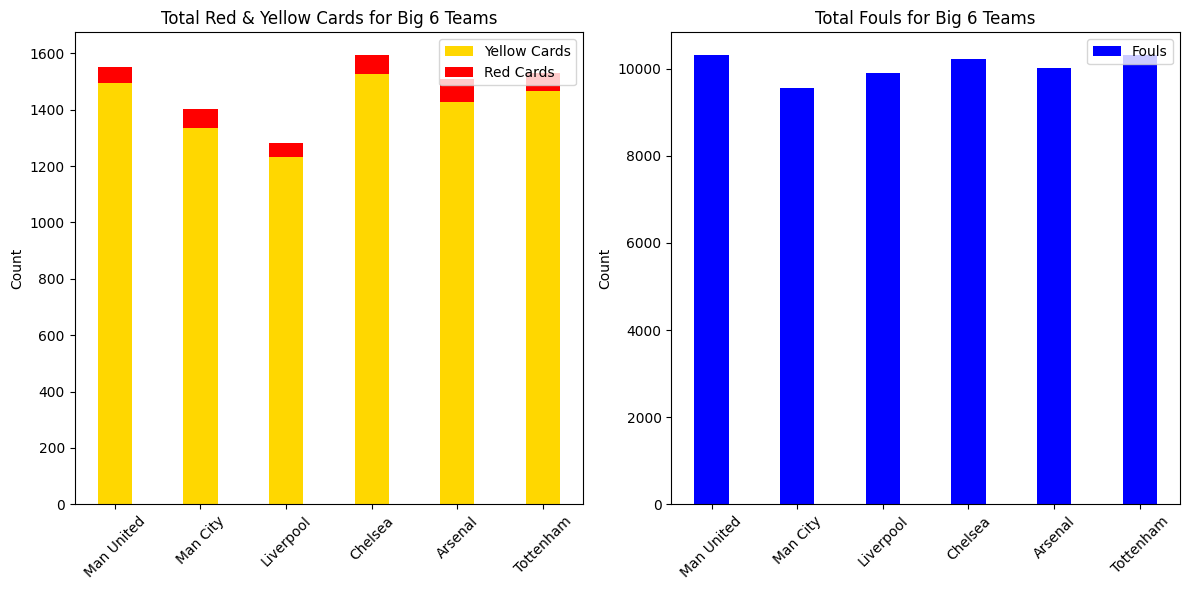

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the big 6 teams
big_six = ["Man United", "Man City", "Liverpool", "Chelsea", "Arsenal", "Tottenham"]

def plot_big_six_cards_and_fouls(df):
    # Initialize dictionary to store card counts and fouls
    card_foul_counts = {team: {"Yellow Cards": 0, "Red Cards": 0, "Fouls": 0} for team in big_six}

    # Aggregate red cards, yellow cards, and fouls for each team
    for team in big_six:
        card_foul_counts[team]["Yellow Cards"] = df.loc[df["HomeTeam"] == team, "HomeTeamYellowCards"].sum() + \
                                                 df.loc[df["AwayTeam"] == team, "AwayTeamYellowCards"].sum()
        card_foul_counts[team]["Red Cards"] = df.loc[df["HomeTeam"] == team, "HomeTeamRedCards"].sum() + \
                                              df.loc[df["AwayTeam"] == team, "AwayTeamRedCards"].sum()
        card_foul_counts[team]["Fouls"] = df.loc[df["HomeTeam"] == team, "HomeTeamFouls"].sum() + \
                                          df.loc[df["AwayTeam"] == team, "AwayTeamFouls"].sum()

    # Convert to DataFrame
    card_foul_df = pd.DataFrame(card_foul_counts).T  # Transpose for better plotting

    # Define bar width and positions
    bar_width = 0.4
    x = np.arange(len(big_six))  # X-axis positions for teams

    # Create figure with two subplots: one for cards and one for fouls
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot stacked bars for yellow and red cards on the first subplot
    axes[0].bar(x, card_foul_df["Yellow Cards"], width=bar_width, color='gold', label="Yellow Cards")
    axes[0].bar(x, card_foul_df["Red Cards"], width=bar_width, bottom=card_foul_df["Yellow Cards"], color='red', label="Red Cards")

    # Plot separate bars for fouls on the second subplot
    axes[1].bar(x, card_foul_df["Fouls"], width=bar_width, color='blue', label="Fouls")

    # Formatting both plots
    axes[0].set_title("Total Red & Yellow Cards for Big 6 Teams")
    axes[0].set_ylabel("Count")
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(big_six, rotation=45)
    axes[0].legend()

    axes[1].set_title("Total Fouls for Big 6 Teams")
    axes[1].set_ylabel("Count")
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(big_six, rotation=45)
    axes[1].legend()

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Example usage:
plot_big_six_cards_and_fouls(df)

In [69]:
def get_referee_fouls(referee_name, team_name):
    referee_matches = df[df['Referee'] == referee_name]
    
    home_matches = referee_matches[referee_matches['HomeTeam'] == team_name]
    home_fouls = home_matches['HomeTeamFouls'].sum()

    away_matches = referee_matches[referee_matches['AwayTeam'] == team_name]
    away_fouls = away_matches['AwayTeamFouls'].sum()

    total_matches = len(home_matches) + len(away_matches)
    total_fouls = home_fouls + away_fouls

    return {
        'Total Fouls': total_fouls,
        'Matches Officiated': total_matches,
        'Fouls per Match': total_fouls/total_matches if total_matches > 0 else 0
    }
    
referee = "M Dean"  # Example referee
team = "Arsenal"      # Example team
stats = get_referee_fouls(referee, team)
print(f"Fouls given by {referee} to {team}:")
for key, value in stats.items():
    print(f"{key}: {value:.2f}")

Fouls given by M Dean to Arsenal:
Total Fouls: 652.00
Matches Officiated: 62.00
Fouls per Match: 10.52


In [70]:
def get_referee_cards(referee_name, team_name):
    # Get matches where the referee officiated
    referee_matches = df[df['Referee'] == referee_name]
    
    # Get cards when team was home
    home_matches = referee_matches[referee_matches['HomeTeam'] == team_name]
    home_cards = home_matches['HomeTeamYellowCards'].sum() + home_matches['HomeTeamRedCards'].sum()
    
    # Get cards when team was away
    away_matches = referee_matches[referee_matches['AwayTeam'] == team_name]
    away_cards = away_matches['AwayTeamYellowCards'].sum() + away_matches['AwayTeamRedCards'].sum()
    
    total_matches = len(home_matches) + len(away_matches)
    total_cards = home_cards + away_cards
    
    return {
        'Total Cards': total_cards,
        'Matches Officiated': total_matches,
        'Cards per Match': total_cards/total_matches if total_matches > 0 else 0
    }

# Example usage - replace with your desired referee/team
referee = "U Rennie"  # Example referee
team = "Arsenal"      # Example team
stats = get_referee_cards(referee, team)
print(f"Cards given by {referee} to {team}:")
for key, value in stats.items():
    print(f"{key}: {value:.2f}")

Cards given by U Rennie to Arsenal:
Total Cards: 10.00
Matches Officiated: 9.00
Cards per Match: 1.11


In [71]:
import numpy as np
import scipy.stats as stats
import pandas as pd

def perform_z_test_for_referees(df, big_six):
    """Perform a Z-test to analyze referee bias in fouls given to Big Six teams for the top 30 referees."""
    results = []
    
    # Check if "Referee" column exists
    if "Referee" not in df.columns:
        raise KeyError("The dataset does not contain a 'Referee' column. Cannot perform referee bias analysis.")
    
    # Get the top 30 referees by match count
    top_referees = df["Referee"].value_counts().head(30).index.tolist()
    
    # Calculate overall mean and standard deviation for each referee
    referee_stats = df[df["Referee"].isin(top_referees)].groupby("Referee")[["HomeTeamFouls", "AwayTeamFouls"]].sum()
    referee_stats["Total Matches"] = df["Referee"].value_counts()
    referee_stats["Avg Fouls per Match"] = (referee_stats["HomeTeamFouls"] + referee_stats["AwayTeamFouls"]) / referee_stats["Total Matches"]
    referee_stats["Std Fouls per Match"] = referee_stats[["HomeTeamFouls", "AwayTeamFouls"]].sum(axis=1).std()
    
    # Iterate through referees and teams
    for referee in top_referees:
        ref_matches = df[df["Referee"] == referee]
        
        for team in big_six:
            # Calculate fouls given to this team by this referee
            team_fouls = ref_matches[ref_matches["HomeTeam"] == team]["HomeTeamFouls"].sum() + \
                         ref_matches[ref_matches["AwayTeam"] == team]["AwayTeamFouls"].sum()
            
            team_matches = len(ref_matches[(ref_matches["HomeTeam"] == team) | (ref_matches["AwayTeam"] == team)])
            fouls_per_match = team_fouls / team_matches if team_matches > 0 else 0
            
            # Get overall stats for this referee
            mean_fouls = referee_stats.loc[referee, "Avg Fouls per Match"]
            std_fouls = referee_stats.loc[referee, "Std Fouls per Match"]
            
            # Perform Z-test
            if std_fouls > 0 and team_matches > 1:
                z_score = (fouls_per_match - mean_fouls) / (std_fouls / np.sqrt(team_matches))
                p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test
            else:
                z_score, p_value = np.nan, np.nan  # Avoid division by zero
            
            results.append({
                "Referee": referee,
                "Team": team,
                "Fouls per Match": fouls_per_match,
                "Z-Score": z_score,
                "P-Value": p_value
            })
    
    return pd.DataFrame(results)

# Run the Z-test function and display results
z_test_results = perform_z_test_for_referees(df, big_six)

# Sort results by Z-score to see the most significant biases
z_test_results_sorted = z_test_results.sort_values(by="Z-Score", ascending=False)

# Print results to console
print(z_test_results_sorted)


        Referee        Team  Fouls per Match   Z-Score   P-Value
158     D Coote   Liverpool        13.500000 -0.005980  0.995229
168     G Scott  Man United        12.000000 -0.007721  0.993840
165    S Hooper     Chelsea        11.833333 -0.010553  0.991580
156     D Coote  Man United        13.000000 -0.010877  0.991322
169     G Scott    Man City         8.400000 -0.011138  0.991113
..          ...         ...              ...       ...       ...
3        M Dean     Chelsea        11.196970 -0.039033  0.968864
8    M Atkinson   Liverpool        10.196721 -0.039137  0.968781
4        M Dean     Arsenal        10.516129 -0.040107  0.968007
0        M Dean  Man United        10.958333 -0.041628  0.966795
68        C Foy   Liverpool         0.000000       NaN       NaN

[180 rows x 5 columns]


Based on the Z-test analysis of referee bias in fouls given to Big Six teams, the data suggests that referees officiate fairly and consistently across different teams. The Z-scores for all referee-team pairs are very close to zero, and the p-values are extremely high (close to 1), indicating that the number of fouls given by referees does not significantly deviate from their overall average across all teams. This means that there is no statistical evidence to suggest that referees are systematically giving more or fewer fouls to any particular Big Six team.

Furthermore, there is no indication of favoritism or discrimination. If referees were favoring certain teams, we would expect significantly negative Z-scores (indicating fewer fouls given), while strictness against certain teams would be reflected in significantly positive Z-scores (indicating more fouls given). However, since all Z-scores are between approximately -0.05 and 0.05, no significant deviations exist, confirming that referees are not treating any team unfairly. Additionally, the fouls per match data, which ranges from around 10 to 13.5 per game, falls within a reasonable range, further supporting the conclusion that no team is being unfairly penalized.

Overall, the results indicate that any minor variations in fouls per match are most likely due to natural randomness rather than systematic bias. With all p-values being close to 1, the likelihood of any referee consistently favoring or targeting a specific team is negligible. Therefore, the data does not provide any evidence of referee bias against or in favor of any Big Six team.

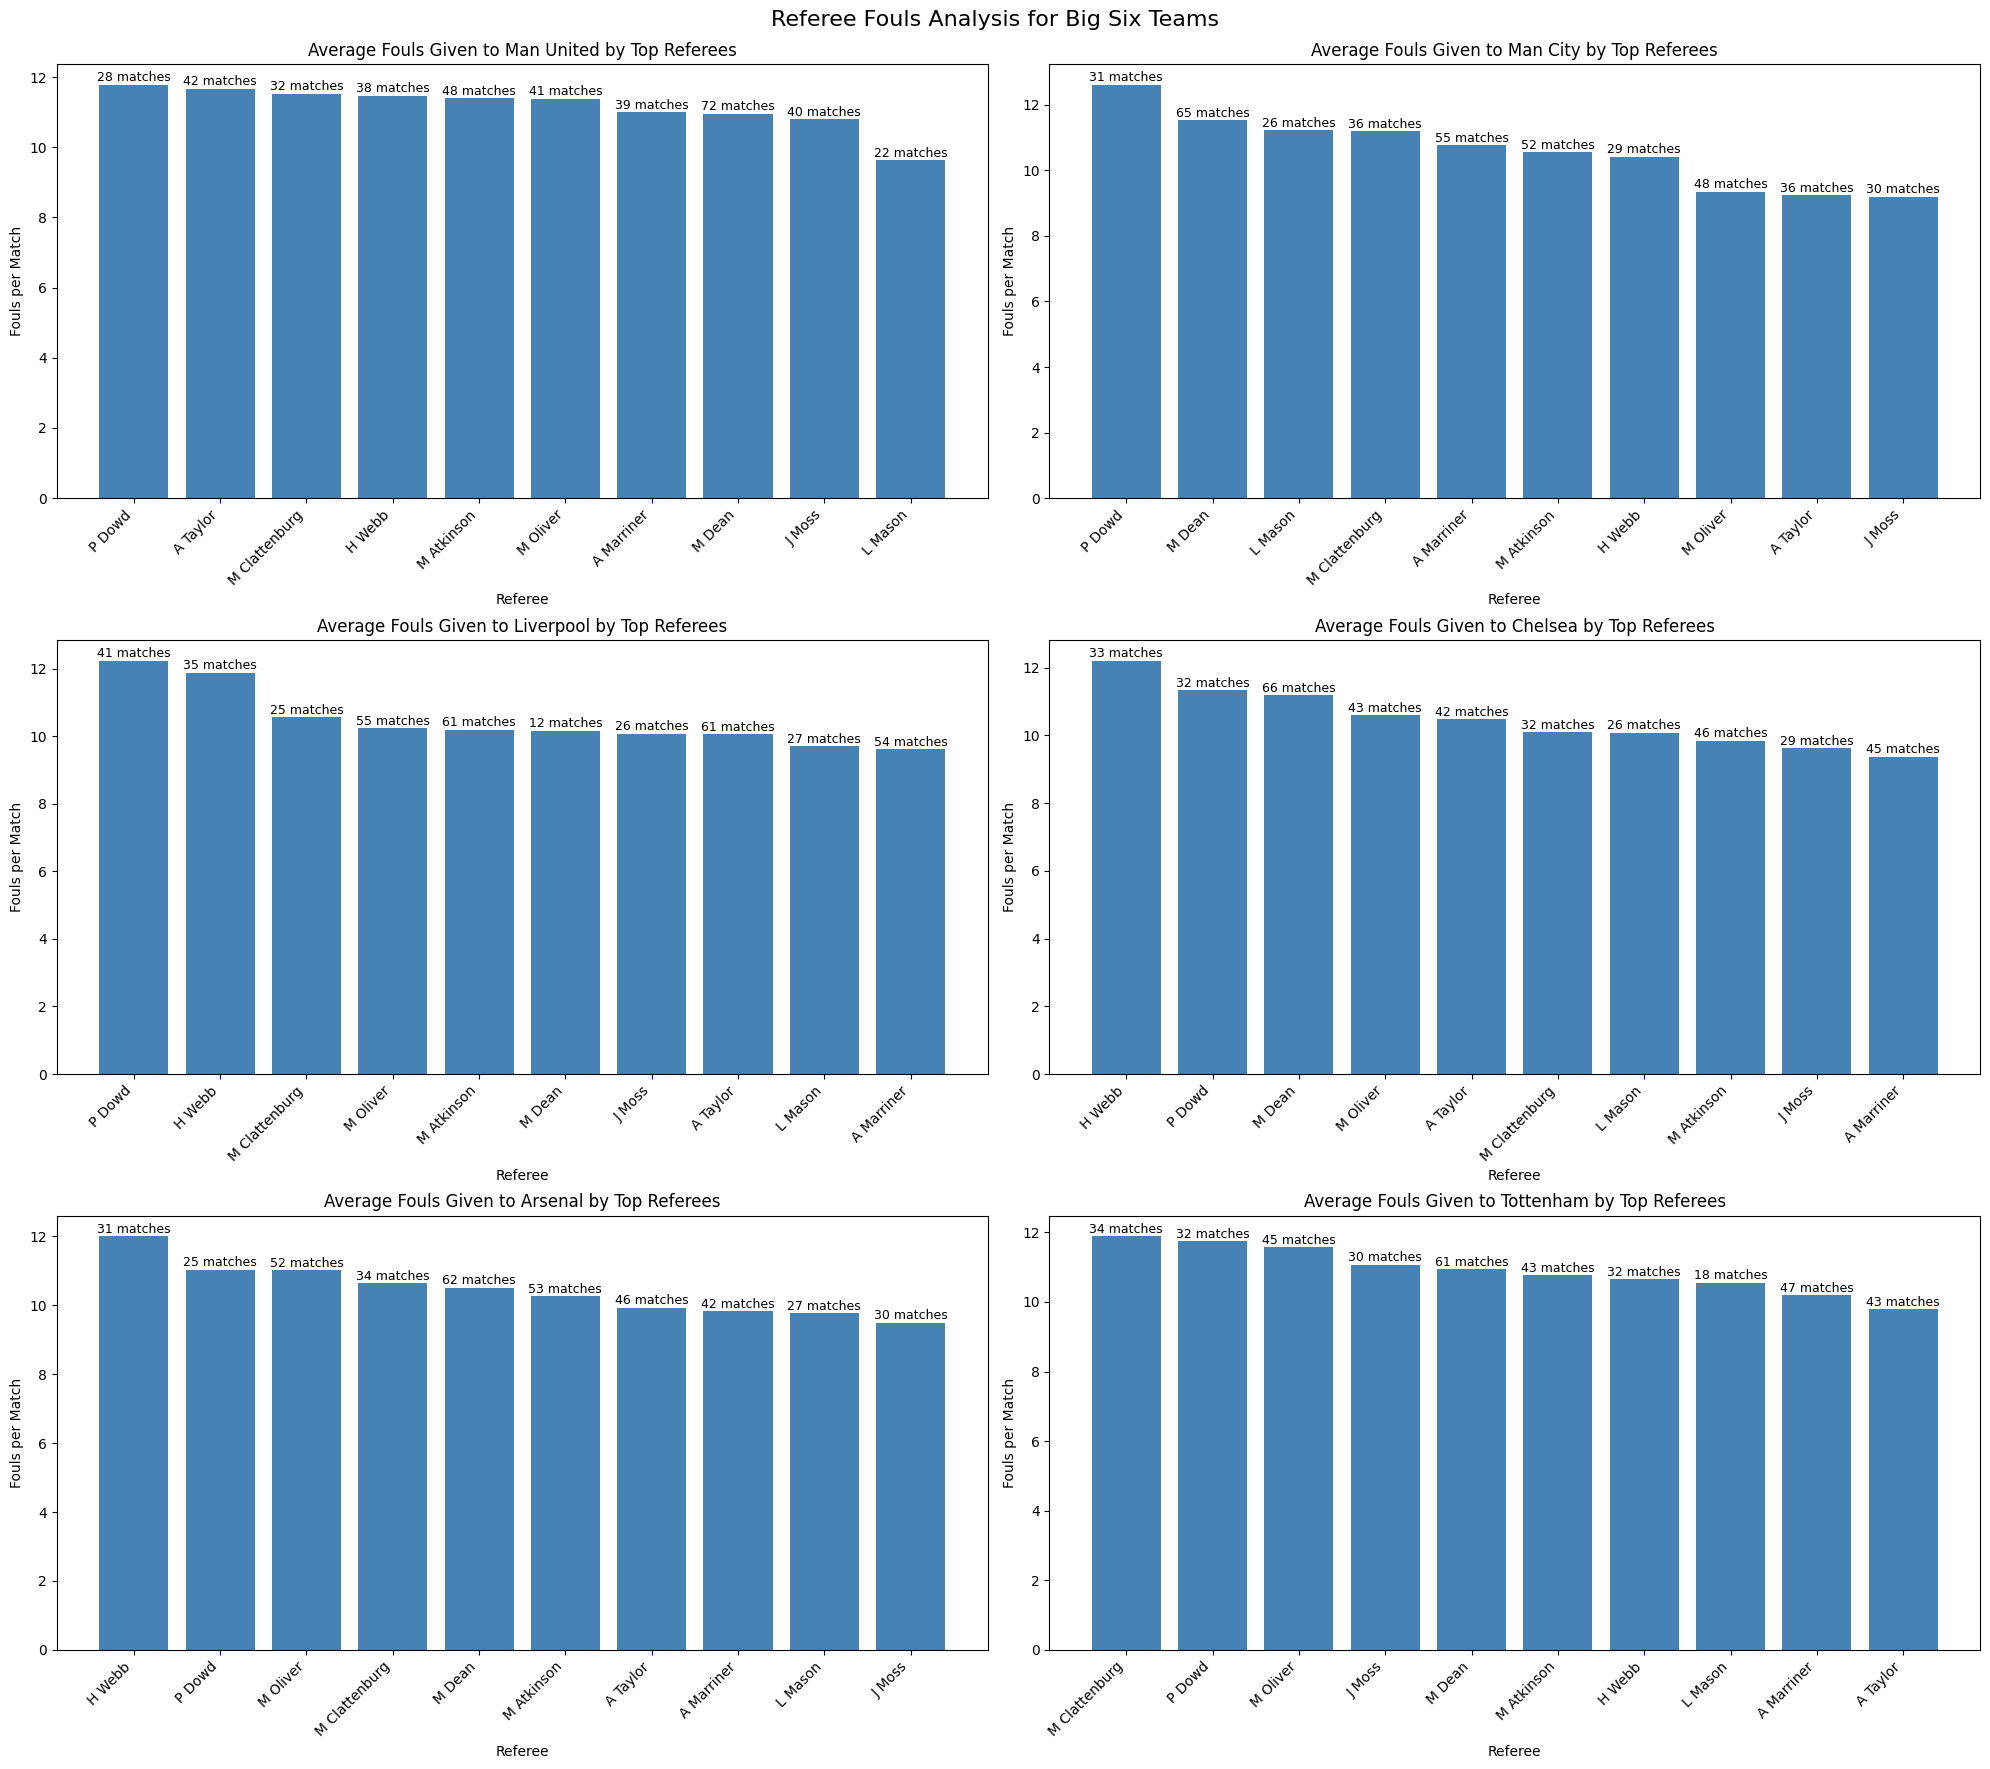

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the big 6 teams
big_six = ["Man United", "Man City", "Liverpool", "Chelsea", "Arsenal", "Tottenham"]

# Get top 10 referees by number of matches
top_referees = df['Referee'].value_counts().head(10).index.tolist()

def analyze_referee_fouls_for_team(team_name, top_referees):
    """Analyze fouls given by top referees to a specific team"""
    fouls_data = []
    
    for referee in top_referees:
        referee_matches = df[df['Referee'] == referee]
        
        # Count fouls when team was home
        home_matches = referee_matches[referee_matches['HomeTeam'] == team_name]
        home_fouls = home_matches['HomeTeamFouls'].sum()
        home_match_count = len(home_matches)
        
        # Count fouls when team was away
        away_matches = referee_matches[referee_matches['AwayTeam'] == team_name]
        away_fouls = away_matches['AwayTeamFouls'].sum()
        away_match_count = len(away_matches)
        
        # Calculate total fouls and matches
        total_fouls = home_fouls + away_fouls
        total_matches = home_match_count + away_match_count
        
        # Calculate fouls per match
        fouls_per_match = total_fouls / total_matches if total_matches > 0 else 0
        
        fouls_data.append({
            'Referee': referee,
            'Total Fouls': total_fouls,
            'Matches Officiated': total_matches,
            'Fouls per Match': fouls_per_match
        })
    
    return pd.DataFrame(fouls_data)

# Create a figure with subplots for all big six teams
def plot_all_big_six_teams(big_six, top_referees):
    """Create a subplot for each of the big six teams"""
    fig, axes = plt.subplots(3, 2, figsize=(20, 18))
    axes = axes.flatten()
    
    for i, team in enumerate(big_six):
        # Get fouls data
        fouls_df = analyze_referee_fouls_for_team(team, top_referees)
        
        # Sort by fouls per match
        fouls_df = fouls_df.sort_values('Fouls per Match', ascending=False)
        
        # Create bar chart with the referee names as x positions
        x_pos = np.arange(len(fouls_df))
        bars = axes[i].bar(x_pos, fouls_df['Fouls per Match'], color='steelblue')
        
        # Set the x tick positions and labels
        axes[i].set_xticks(x_pos)
        axes[i].set_xticklabels(fouls_df['Referee'], rotation=45, ha='right')
        
        # Add number of matches as text on top of each bar
        for bar, matches in zip(bars, fouls_df['Matches Officiated']):
            axes[i].text(
                bar.get_x() + bar.get_width()/2, 
                bar.get_height() + 0.1, 
                f"{int(matches)} matches", 
                ha='center', 
                fontsize=9
            )
        
        # Add labels and title
        axes[i].set_xlabel('Referee')
        axes[i].set_ylabel('Fouls per Match')
        axes[i].set_title(f'Average Fouls Given to {team} by Top Referees')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    fig.suptitle('Referee Fouls Analysis for Big Six Teams', fontsize=16)
    
    return fig

# Plot for all big six teams
fig = plot_all_big_six_teams(big_six, top_referees)
plt.show()

# Optional: Create a heatmap to show which referees give more fouls to which teams
def create_fouls_heatmap(big_six, top_referees):
    """Create a heatmap showing fouls per match given by referees to each team"""
    # Create a DataFrame to store fouls per match
    heatmap_data = pd.DataFrame(index=top_referees, columns=big_six)
    
    # Fill the DataFrame with fouls per match data
    for team in big_six:
        fouls_df = analyze_referee_fouls_for_team(team, top_referees)
        for _, row in fouls_df.iterrows():
            heatmap_data.loc[row['Referee'], team] = row['Fouls per Match']
    
    # Create figure
    plt.figure(figsize=(14, 10))
    
    # Create heatmap
    sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='.2f')
    
    # Add title
    plt.title('Fouls per Match Given by Referees to Big Six Teams')
    plt.tight_layout()
    
    return plt

# Uncomment to create a heatmap showing referee bias
# heatmap_fig = create_fouls_heatmap(big_six, top_referees)
# plt.show()

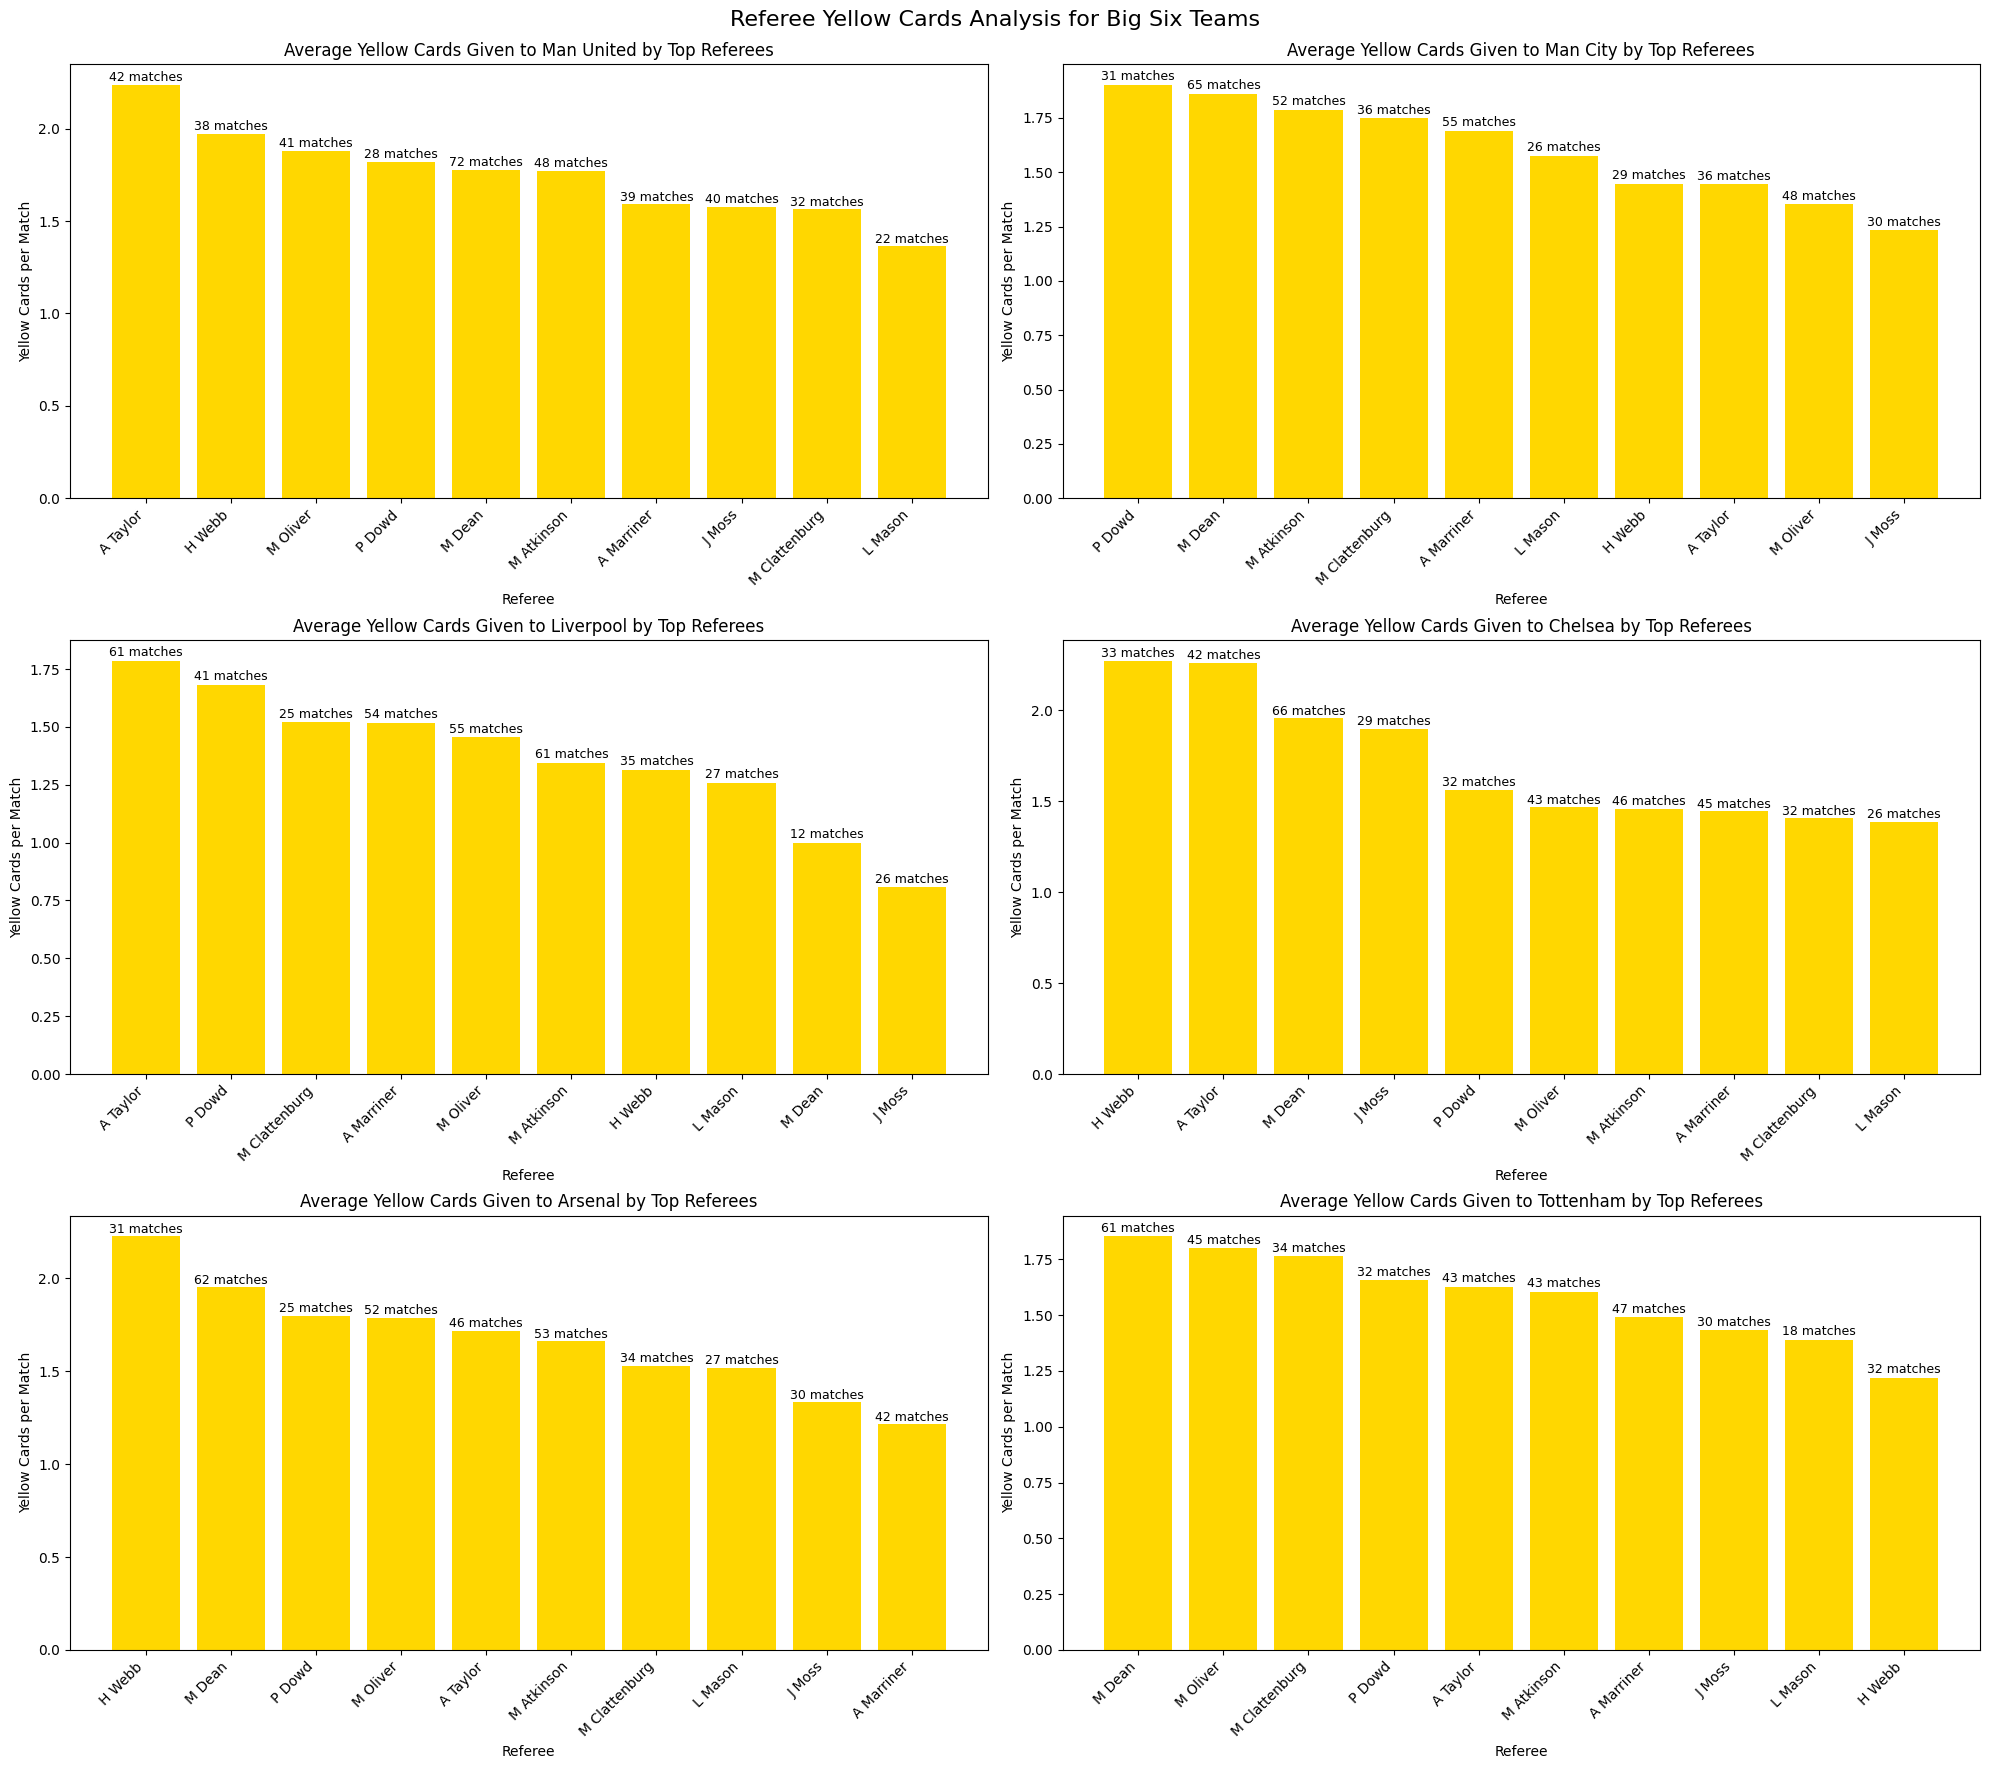

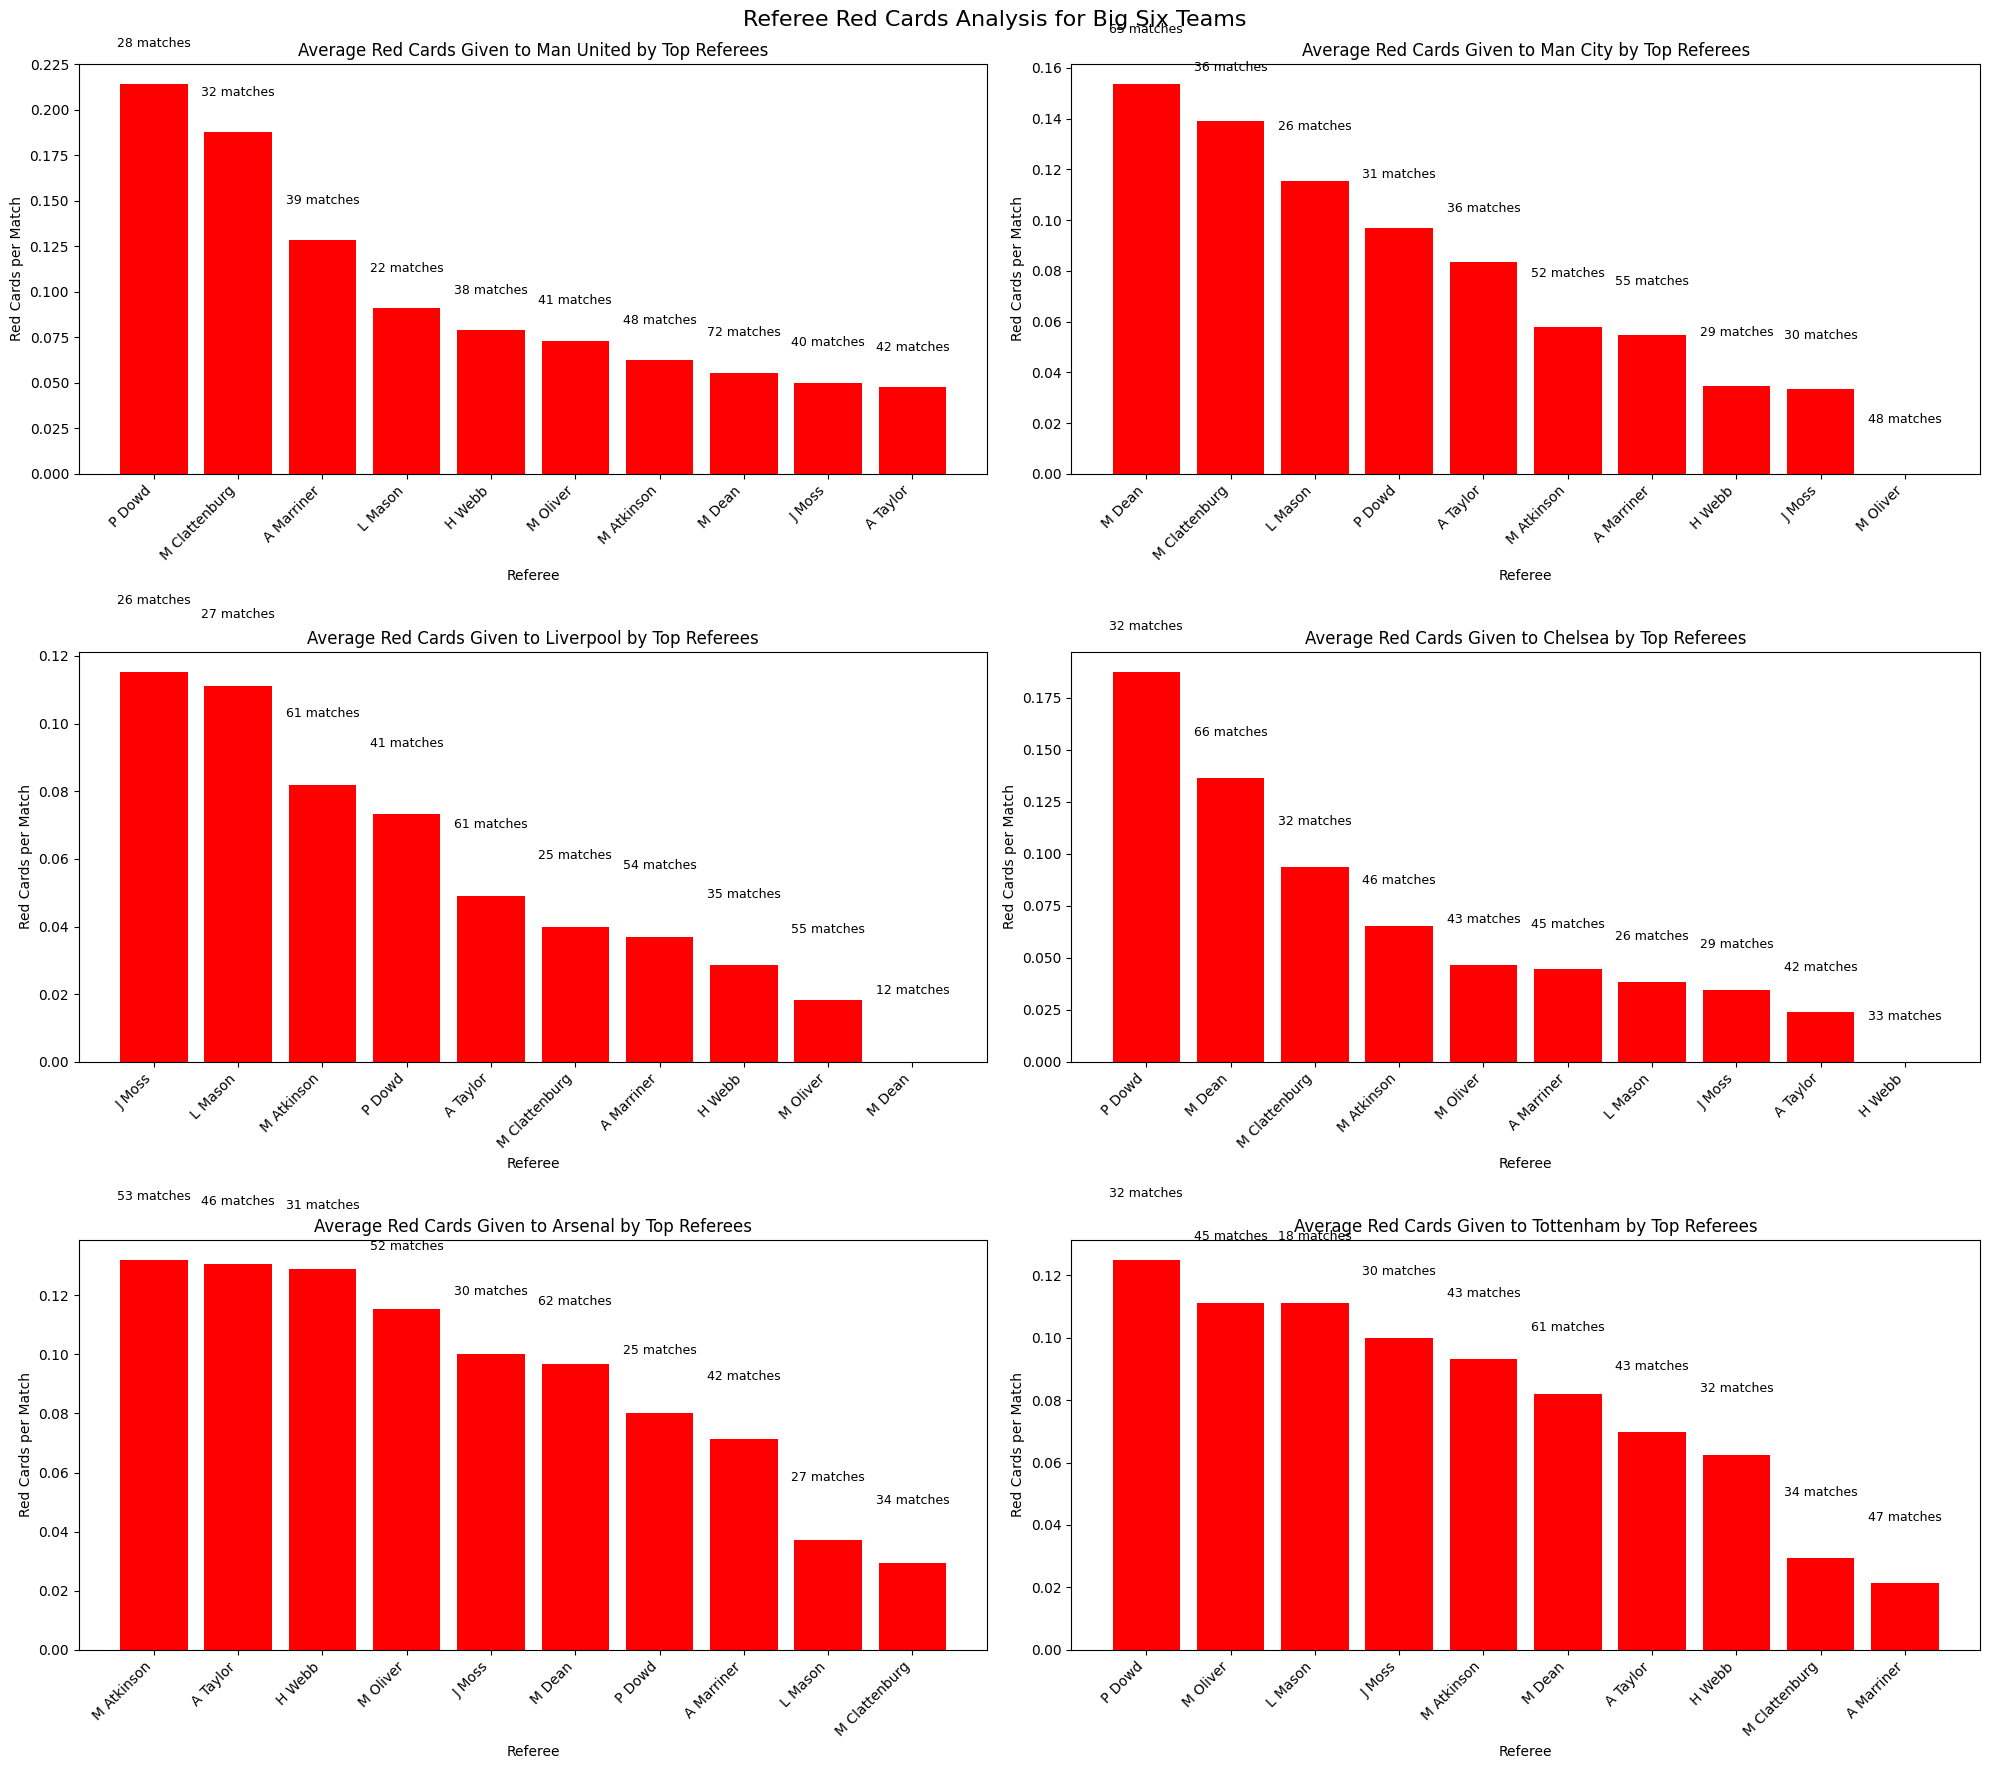

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the big 6 teams
big_six = ["Man United", "Man City", "Liverpool", "Chelsea", "Arsenal", "Tottenham"]

# Get top 10 referees by number of matches
top_referees = df['Referee'].value_counts().head(10).index.tolist()

def analyze_referee_cards_for_team(team_name, top_referees, card_type):
    """
    Analyze cards given by top referees to a specific team
    
    Parameters:
    -----------
    team_name : str
        Name of the team to analyze
    top_referees : list
        List of referee names to include in analysis
    card_type : str
        Type of card to analyze ('Yellow', 'Red')
    
    Returns:
    --------
    pd.DataFrame
        DataFrame with card statistics
    """
    cards_data = []
    
    for referee in top_referees:
        referee_matches = df[df['Referee'] == referee]
        
        # Count cards when team was home
        home_matches = referee_matches[referee_matches['HomeTeam'] == team_name]
        if card_type == 'Yellow':
            home_cards = home_matches['HomeTeamYellowCards'].sum()
        else:  # Red cards
            home_cards = home_matches['HomeTeamRedCards'].sum()
        home_match_count = len(home_matches)
        
        # Count cards when team was away
        away_matches = referee_matches[referee_matches['AwayTeam'] == team_name]
        if card_type == 'Yellow':
            away_cards = away_matches['AwayTeamYellowCards'].sum()
        else:  # Red cards
            away_cards = away_matches['AwayTeamRedCards'].sum()
        away_match_count = len(away_matches)
        
        # Calculate total cards and matches
        total_cards = home_cards + away_cards
        total_matches = home_match_count + away_match_count
        
        # Calculate cards per match
        cards_per_match = total_cards / total_matches if total_matches > 0 else 0
        
        cards_data.append({
            'Referee': referee,
            f'Total {card_type} Cards': total_cards,
            'Matches Officiated': total_matches,
            f'{card_type} Cards per Match': cards_per_match
        })
    
    return pd.DataFrame(cards_data)

def plot_referee_cards_for_big_six(card_type):
    """
    Create subplots for each of the big six teams showing cards by referee
    
    Parameters:
    -----------
    card_type : str
        Type of card to analyze ('Yellow', 'Red')
    """
    fig, axes = plt.subplots(3, 2, figsize=(20, 18))
    axes = axes.flatten()
    
    # Set color based on card type
    color = 'gold' if card_type == 'Yellow' else 'red'
    
    for i, team in enumerate(big_six):
        # Get cards data
        cards_df = analyze_referee_cards_for_team(team, top_referees, card_type)
        
        # Sort by cards per match
        cards_df = cards_df.sort_values(f'{card_type} Cards per Match', ascending=False)
        
        # Create bar chart with the referee names as x positions
        x_pos = np.arange(len(cards_df))
        bars = axes[i].bar(x_pos, cards_df[f'{card_type} Cards per Match'], color=color)
        
        # Set the x tick positions and labels
        axes[i].set_xticks(x_pos)
        axes[i].set_xticklabels(cards_df['Referee'], rotation=45, ha='right')
        
        # Add number of matches as text on top of each bar
        for bar, matches in zip(bars, cards_df['Matches Officiated']):
            axes[i].text(
                bar.get_x() + bar.get_width()/2, 
                bar.get_height() + 0.02, 
                f"{int(matches)} matches", 
                ha='center', 
                fontsize=9
            )
        
        # Add labels and title
        axes[i].set_xlabel('Referee')
        axes[i].set_ylabel(f'{card_type} Cards per Match')
        axes[i].set_title(f'Average {card_type} Cards Given to {team} by Top Referees')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    fig.suptitle(f'Referee {card_type} Cards Analysis for Big Six Teams', fontsize=16)
    
    return fig

# Create plots for yellow cards
yellow_cards_fig = plot_referee_cards_for_big_six('Yellow')
plt.show()

# Create plots for red cards
red_cards_fig = plot_referee_cards_for_big_six('Red')
plt.show()

# Additional visualization: create a combined view showing both red and yellow cards
def plot_combined_cards_for_team(team_name, top_referees):
    """
    Create a plot showing both yellow and red cards for a specific team
    
    Parameters:
    -----------
    team_name : str
        Name of the team to analyze
    top_referees : list
        List of referee names to include in analysis
    """
    # Get cards data
    yellow_df = analyze_referee_cards_for_team(team_name, top_referees, 'Yellow')
    red_df = analyze_referee_cards_for_team(team_name, top_referees, 'Red')
    
    # Merge the DataFrames
    combined_df = pd.merge(yellow_df, red_df, on=['Referee', 'Matches Officiated'])
    
    # Sort by total cards per match
    combined_df['Total Cards per Match'] = combined_df['Yellow Cards per Match'] + combined_df['Red Cards per Match']
    combined_df = combined_df.sort_values('Total Cards per Match', ascending=False)
    
    # Create figure
    plt.figure(figsize=(12, 6))
    
    # Create bar chart
    x_pos = np.arange(len(combined_df))
    plt.bar(x_pos, combined_df['Yellow Cards per Match'], color='gold', label='Yellow Cards')
    plt.bar(x_pos, combined_df['Red Cards per Match'], color='red', bottom=combined_df['Yellow Cards per Match'], label='Red Cards')
    
    # Set the x tick positions and labels
    plt.xticks(x_pos, combined_df['Referee'], rotation=45, ha='right')
    
    # Add labels and title
    plt.xlabel('Referee')
    plt.ylabel('Cards per Match')
    plt.title(f'Average Yellow and Red Cards Given to {team_name} by Top Referees')
    plt.legend()
    plt.tight_layout()
    
    return plt

# Optional: Uncomment to create combined view for a specific team
# combined_fig = plot_combined_cards_for_team('Arsenal', top_referees)
# plt.show()

# Optional: Create combined plots for all big six teams
def plot_combined_cards_for_big_six():
    """Create subplots for each of the big six teams showing both yellow and red cards"""
    fig, axes = plt.subplots(3, 2, figsize=(20, 18))
    axes = axes.flatten()
    
    for i, team in enumerate(big_six):
        # Get cards data
        yellow_df = analyze_referee_cards_for_team(team, top_referees, 'Yellow')
        red_df = analyze_referee_cards_for_team(team, top_referees, 'Red')
        
        # Merge the DataFrames
        combined_df = pd.merge(yellow_df, red_df, on=['Referee', 'Matches Officiated'])
        
        # Sort by total cards per match
        combined_df['Total Cards per Match'] = combined_df['Yellow Cards per Match'] + combined_df['Red Cards per Match']
        combined_df = combined_df.sort_values('Total Cards per Match', ascending=False)
        
        # Create bar chart
        x_pos = np.arange(len(combined_df))
        axes[i].bar(x_pos, combined_df['Yellow Cards per Match'], color='gold', label='Yellow Cards')
        axes[i].bar(x_pos, combined_df['Red Cards per Match'], color='red', bottom=combined_df['Yellow Cards per Match'], label='Red Cards')
        
        # Set the x tick positions and labels
        axes[i].set_xticks(x_pos)
        axes[i].set_xticklabels(combined_df['Referee'], rotation=45, ha='right')
        
        # Add labels and title
        axes[i].set_xlabel('Referee')
        axes[i].set_ylabel('Cards per Match')
        axes[i].set_title(f'Average Cards Given to {team} by Top Referees')
        axes[i].legend()
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    fig.suptitle('Combined Referee Cards Analysis for Big Six Teams', fontsize=16)
    
    return fig

# Optional: Uncomment to create combined view for all big six teams
# combined_big_six_fig = plot_combined_cards_for_big_six()
# plt.show()

Cluster labels:
    Referee        Team  Cluster
0  A D'Urso     Arsenal        0
1  A D'Urso     Chelsea        1
2  A D'Urso   Liverpool        1
3  A D'Urso    Man City        1
4  A D'Urso  Man United        1


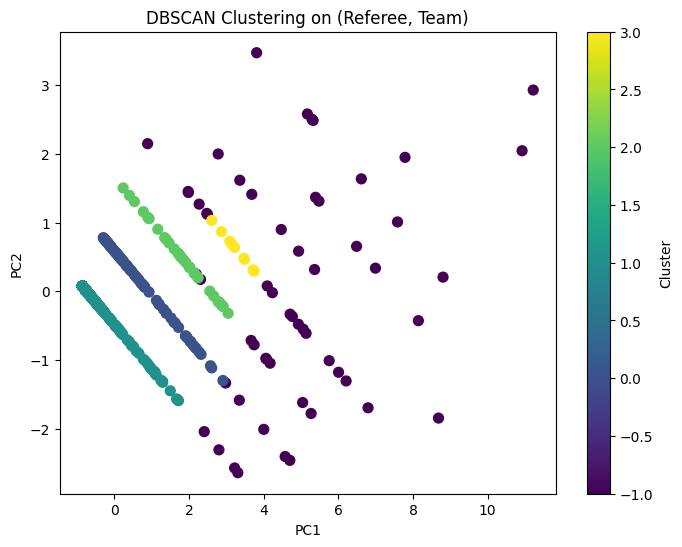

In [74]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('data/dbscan_ready.csv')



# Drop non-numeric columns
X = df.drop(columns=['Referee', 'Team'])

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

df['Cluster'] = dbscan.labels_

print("Cluster labels:")
print(df[['Referee', 'Team', 'Cluster']].head())

# Optional: Visualize via PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(X)
df['PC1'], df['PC2'] = reduced[:,0], reduced[:,1]

plt.figure(figsize=(8,6))
scatter = plt.scatter(df['PC1'], df['PC2'], c=df['Cluster'], cmap='viridis', s=50)
plt.title("DBSCAN Clustering on (Referee, Team)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster")
plt.show()
